<a href="https://colab.research.google.com/github/Polo10101/Emotion_AI_Python/blob/main/EmotionAI_TSSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 DETECCIÓN DE PUNTOS FACIALES CLAVES

IMPORTAR LIBRERÍAS Y DATASETS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Curso de Masterclass en IA Moderna/

/content/drive/My Drive/Curso de Masterclass en IA Moderna


In [ ]:
# Importamos los paquetes necesarios

import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
# Cargamos los puntos faciales clave
keyfacial_df = pd.read_csv('/content/drive/MyDrive/Curso de Masterclass en IA Moderna/data.csv')

In [ ]:
keyfacial_df

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0             66.033564          39.002274           30.227008   
1             64.332936          34.970077           29.949277   
2             65.057053          34.909642           30.903789   
3             65.225739          37.261774           32.023096   
4             66.725301          39.621261           32.244810   
...                 ...                ...                 ...   
2135          67.180378          35.816373           33.239956   
2136          65.724490          36.301020           25.377551   
2137          68.430866          38.651975           28.895857   
2138          64.152180          30.691592           27.000898   
2139          66.683755          34.483429           30.784490   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0              36.421678                59.582075                39.647423   
1              33.448715                58.856170                35.274349   
2              34.909642                59.412000                36.320968   
3              37.261774                60.003339                39.127179   
4              38.042032                58.565890                39.621261   
...                  ...                      ...                      ...   
2135           34.921932                59.347973                37.000904   
2136           37.311224                58.530612                37.739796   
2137           37.617027                61.659350                40.100902   
2138           40.868082                56.505624                34.126963   
2139           38.578939                59.255347                36.065143   

      left_eye_outer_corner_x  left_eye_outer_corner_y  \
0                   73.130346                39.969997   
1                   70.722723                36.187166   
2                   70.984421                36.320968   
3                   72.314713                38.380967   
4                   72.515926                39.884466   
...                       ...                      ...   
2135                72.667896                37.097600   
2136                74.448980                37.525510   
2137                75.586792                40.219182   
2138                73.436776                28.556335   
2139                73.942694                34.624653   

      right_eye_inner_corner_x  right_eye_inner_corner_y  ...  nose_tip_y  \
0                    36.356571                 37.389402  ...   57.066803   
1                    36.034723                 34.361532  ...   55.660936   
2                    37.678105                 36.320968  ...   53.538947   
3                    37.618643                 38.754115  ...   54.166539   
4                    36.982380                 39.094852  ...   64.889521   
...                        ...                       ...  ...         ...   
2135                 39.404349                 36.589944  ...   60.065396   
2136                 33.551020                 38.107143  ...   62.472789   
2137                 37.665118                 39.087245  ...   63.289576   
2138                 34.746122                 40.506939  ...   59.735799   
2139                 37.478531                 39.398041  ...   59.269388   

      mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
0               61.195308            79.970165             28.614496   
1               56.421447            76.352000             35.122383   
2               60.822947            73.014316             33.726316   
3               65.598887            72.703722             37.245496   
4               60.671411            77.523239             31.191755   
...                   ...                  ...                   ...   
2135            64.397610            73.248393             35.446431   
2136            66.928121            79.229046             28.015377   
2137  

In [ ]:
# Obtenemos información relevante del dataset
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [ ]:
# Comprobamos si hay valores nulos en el dataset
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [ ]:
keyfacial_df['Image'].shape

(2140,)

In [ ]:
# Dado que los valores para la imagen se dan como cadenas separadas por espacios, separamos los valores usando ' ' como separador.
# Luego convertimos esto en una matriz numérica usando np.fromstring y convierta la matriz 1D obtenida en una matriz 2D de forma (96, 96)
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96, 96))

In [ ]:
# Obtener la dimension de la imagen
keyfacial_df['Image'][0].shape

(96, 96)

In [ ]:
keyfacial_df.describe()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
count        2140.000000        2140.000000         2140.000000   
mean           66.221549          36.842274           29.640269   
std             2.087683           2.294027            2.051575   
min            47.835757          23.832996           18.922611   
25%            65.046300          35.468842           28.472224   
50%            66.129065          36.913319           29.655440   
75%            67.332093          38.286438           30.858673   
max            78.013082          46.132421           42.495172   

       right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
count         2140.000000              2140.000000              2140.000000   
mean            37.063815                59.272128                37.856014   
std              2.234334                 2.005631                 2.034500   
min             24.773072                41.779381                27.190098   
25%             35.818377                58.113054                36.607950   
50%             37.048085                59.327154                37.845220   
75%             38.333884                60.521492                39.195431   
max             45.980981                69.023030                47.190316   

       left_eye_outer_corner_x  left_eye_outer_corner_y  \
count              2140.000000              2140.000000   
mean                 73.412473                37.640110   
std                   2.701639                 2.684162   
min                  52.947144                26.250023   
25%                  71.741978                36.102409   
50%                  73.240045                37.624207   
75%                  74.978684                39.308331   
max                  87.032252                49.653825   

       right_eye_inner_corner_x  right_eye_inner_corner_y  ...   nose_tip_x  \
count               2140.000000               2140.000000  ...  2140.000000   
mean                  36.603107                 37.920852  ...    47.952141   
std                    1.822784                  2.009505  ...     3.276053   
min                   24.112624                 26.250023  ...    24.472590   
25%                   35.495730                 36.766783  ...    46.495330   
50%                   36.620735                 37.920336  ...    47.900511   
75%                   37.665280                 39.143921  ...    49.260657   
max                   47.293746                 44.887301  ...    65.279654   

        nose_tip_y  mouth_left_corner_x  mouth_left_corner_y  \
count  2140.000000          2140.000000          2140.000000   
mean     57.253926            63.419076            75.887660   
std       4.528635             3.650131             4.438565   
min      41.558400            43.869480            57.023258   
25%      54.466000            61.341291            72.874263   
50%      57.638582            63.199057            75.682465   
75%      60.303524            65.302398            78.774969   
max      75.992731            84.767123            94.673637   

       mouth_right_corner_x  mouth_right_corner_y  mouth_center_top_lip_x  \
count           2140.000000           2140.000000             2140.000000   
mean              32.967365             76.134065               48.081325   
std                3.595103              4.259514                2.723274   
min                9.778137             56.690208               32.260312   
25%               30.879288             73.280038               46.580004   
50%               33.034022             75.941985               47.939031   
75%               35.063575             78.884031               49.290000   
max               50.973348             93.443176               61.804506   

       mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
count             2140.000000                2140.000000   
mean                72.681125                  48.149654

VISUALIZACIÓN DE IMÁGENES


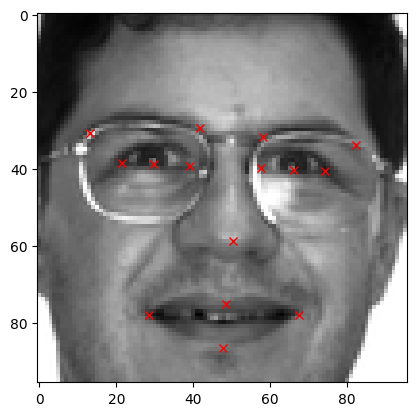

In [ ]:
# Representamos una imagen aleatoria del conjunto de datos junto con puntos clave faciales.
# Los datos de la imagen se obtienen de df ['Image'] y se representan usando plt.imshow
# 15 coordenadas x e y para la imagen correspondiente
# Dado que las coordenadas x están en columnas pares como 0,2,4, .. y las coordenadas y están en columnas impares como 1,3,5, ..
# Accedemos a su valor usando el comando .loc, que obtiene los valores de las coordenadas de la imagen en función de la columna a la que se refiere.

i = np.random.randint(1, len(keyfacial_df))
plt.imshow(keyfacial_df['Image'][i], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')


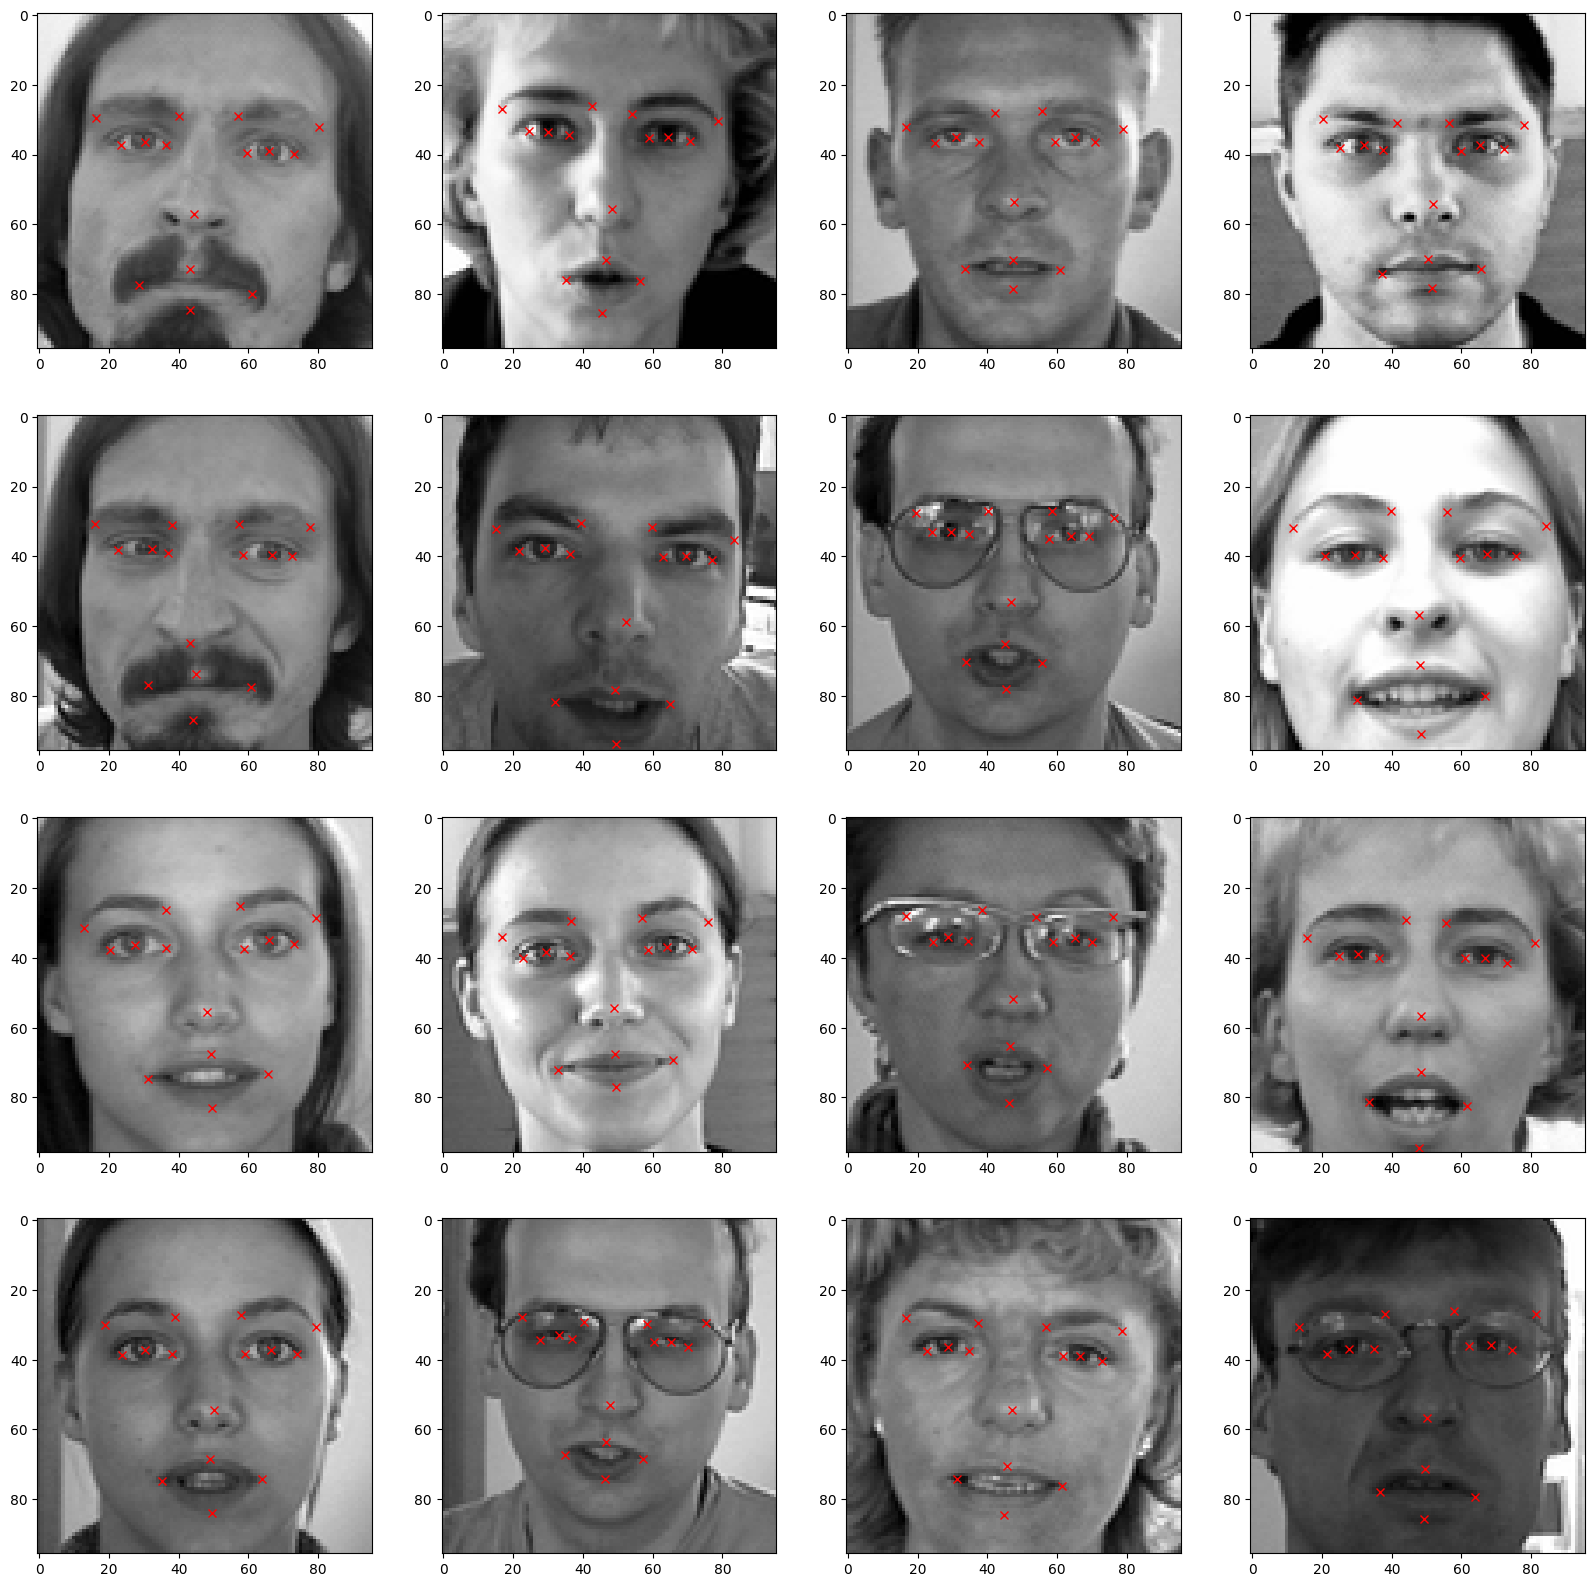

In [ ]:
# Veamos más imágenes en formato matricial
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    image = plt.imshow(keyfacial_df['Image'][i],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')


Hacemos una verificación adicional en los datos visualizando aleatoriamente 64 nuevas imágenes junto con sus puntos clave correspondientes

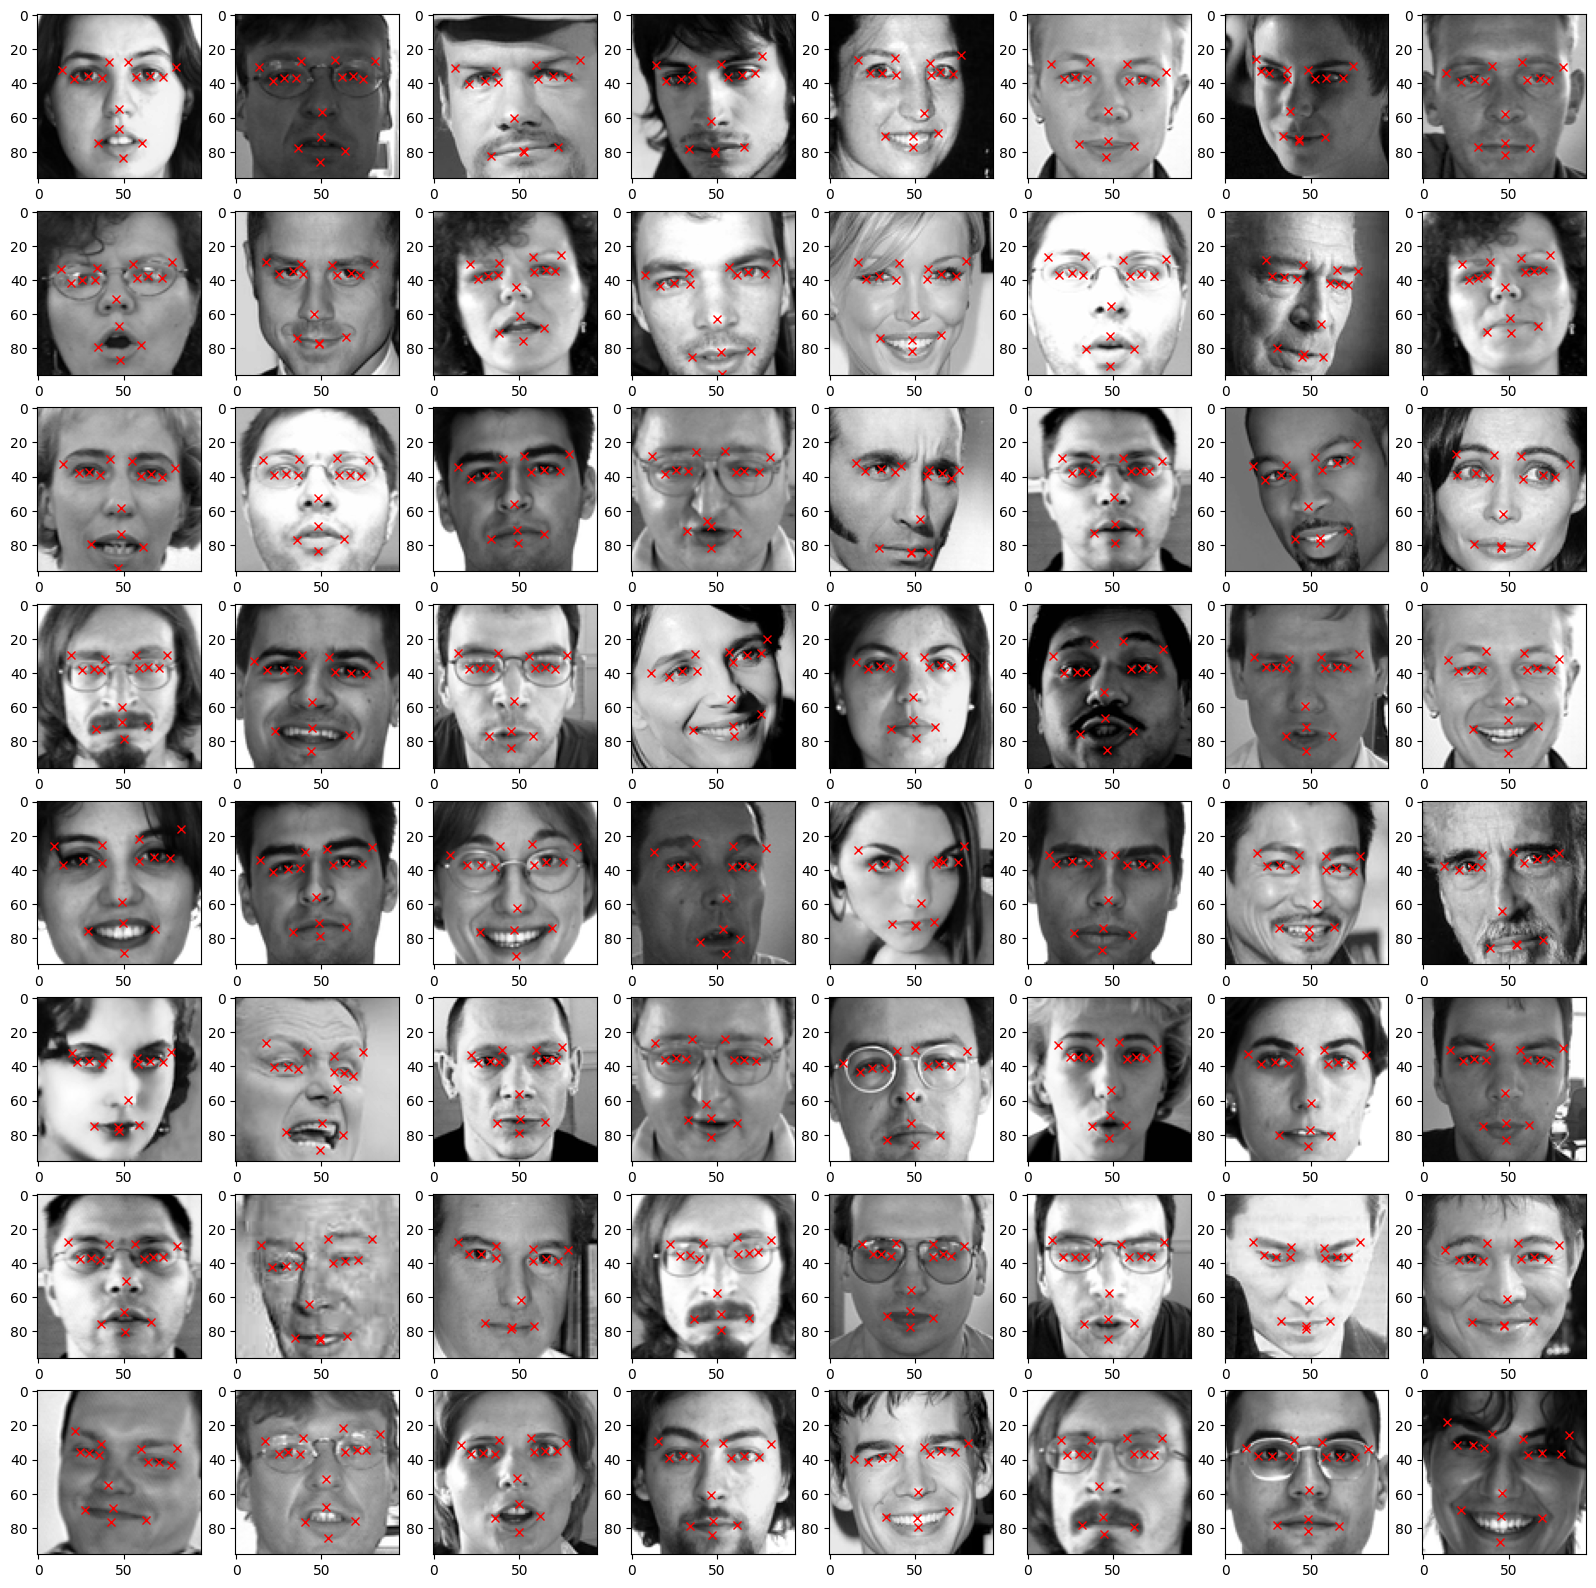

In [ ]:
import random

fig = plt.figure(figsize=(20, 20))

for i in range(64):
    k = random.randint(1, len(keyfacial_df))
    ax = fig.add_subplot(8, 8, i + 1)
    image = plt.imshow(keyfacial_df['Image'][k],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[k][j-1], keyfacial_df.loc[k][j], 'rx')


AUMENTACIÓN DE LAS IMÁGENES

In [ ]:
# Creamos una copia del dataframe
import copy
keyfacial_df_copy = copy.copy(keyfacial_df)

In [ ]:
# Obtenemos las columnas del dataframe

columns = keyfacial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [ ]:
# Horizontal Flip - Damos la vuelta a las imágenes entorno al eje y
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

# dado que estamos volteando horizontalmente, los valores de la coordenada y serían los mismos
# Solo cambiarían los valores de la coordenada x, todo lo que tenemos que hacer es restar nuestros valores iniciales de la coordenada x del ancho de la imagen (96)
for i in range(len(columns)):
  if i%2 == 0:
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

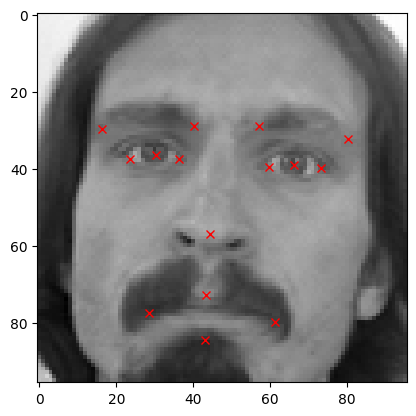

In [ ]:
# Mostramos la imagen original
plt.imshow(keyfacial_df['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'rx')

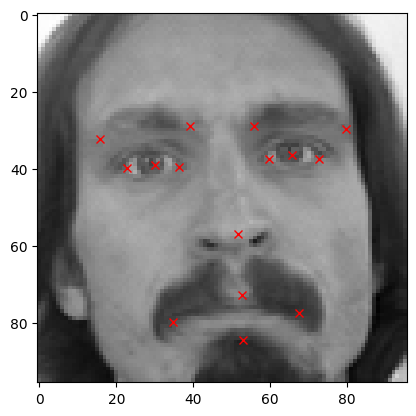

In [ ]:
# Mostramos la imagen girada horizontalmente
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

In [ ]:
# Concatenamos el dataset original con el dataframe aumentado
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy))

In [ ]:
augmented_df.shape

(4280, 31)

In [ ]:
# Aumentar aleatoriamente el brillo de las imágenes
# Multiplicamos los valores de los píxeles por valores aleatorios entre 1,5 y 2 para aumentar el brillo de la imagen
# Recortamos el valor entre 0 y 255

import random

keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x:np.clip(random.uniform(1.5, 2)* x, 0.0, 255.0))
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))
augmented_df.shape

(6420, 31)

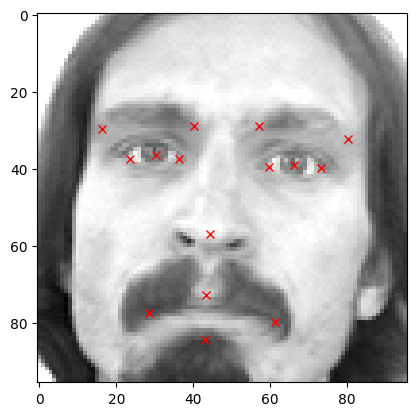

In [ ]:
# Mostramos la imagen con el brillo aumentado

plt.imshow(keyfacial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

NORMALIZACIÓN DE LOS DATOS Y PREPARACIÓN PARA EL ENTRENAMIENTO

In [ ]:
# Obtenemos el valor de las imágenes que está presente en la columna 31 (dado que el índice comienza desde 0, nos referimos a la columna 31 por 30 en Python)
img = augmented_df[:,30]

# Normalizamos las imágenes
img = img/255.

# Creamos un array vacío de tamaño (x, 96, 96, 1) para subministrar al modelo
X = np.empty((len(img), 96, 96, 1))

# Iteramos sobre la lista de imágenes y añadimos las nuevas al array vacío tras expandir su dimensión de (96, 96) a (96, 96, 1)
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis = 2)

# Convertimos el tipo array a float32
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [ ]:
# Obtenemos el valor de las coordenadas x & y que se utilizarán como target.
y = augmented_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [ ]:
# Dividimos los datos en entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Verifica que la división es correcta.

In [ ]:
X_train.shape

(5136, 96, 96, 1)

In [ ]:
X_test.shape

(1284, 96, 96, 1)

CONSTRUIMOS UN MODELO DE RED NEURONAL RESIDUAL PROFUNDA PARA CREAR UN MODELO QUE DETECTE PUNTOS FACIALES CLAVE

In [ ]:
def res_block(X, filter, stage):

  # Bloque Convolucional
  X_copy = X

  f1 , f2, f3 = filter

  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Camino Corto
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 1
  X_copy = X


  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 2
  X_copy = X


  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [ ]:
input_shape = (96, 96, 1)

# Tamaño del tensor de entrada
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - Fase
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - Fase
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - Fase
X = res_block(X, filter= [128,128,512], stage= 3)

# 4 - Fase
#X = res_block(X, filter= [256,256,1024], stage= 4)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Capa Final
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model_1_facialKeyPoints = Model( inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 102, 102, 1)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           3200      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1[0][0]']           

COMPILAR Y ENTRENAR EL MODELO DE DEEP LEARNING PARA LA DETECCIÓN DE PUNTOS FACIALES CLAVE

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])

In [ ]:
# Guardamos el mejor modelo con mejor error de validación
checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose = 1,
                               save_best_only = True,  save_weights_only=True)
# necesario añadir  save_weights_only=True en las nuevas versiones de Python

In [ ]:
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 32,
                                      epochs = 2, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/2
153/153 [==============================] - ETA: 0s - loss: 347.7853 - accuracy: 0.4907
Epoch 1: val_loss improved from inf to 922.62506, saving model to FacialKeyPoints_weights.hdf5
153/153 [==============================] - 30s 76ms/step - loss: 347.7853 - accuracy: 0.4907 - val_loss: 922.6251 - val_accuracy: 0.7160
Epoch 2/2
152/153 [============================>.] - ETA: 0s - loss: 177.3614 - accuracy: 0.6014
Epoch 2: val_loss improved from 922.62506 to 358.07797, saving model to FacialKeyPoints_weights.hdf5
153/153 [==============================] - 4s 24ms/step - loss: 177.1098 - accuracy: 0.6007 - val_loss: 358.0780 - val_accuracy: 0.7160


In [ ]:
# Guardamos la arquitectura del modelo en un JSON para luego usarlo

model_json = model_1_facialKeyPoints.to_json()
with open("FacialKeyPoints-model.json","w") as json_file:
  json_file.write(model_json)


EVALUAMOS LA EFICACIA DEL MODELO DE DETECCIÓN DE PUNTOS FACIALES CLAVE ENTRENADO

In [ ]:
with open('detection.json', 'r') as json_file:
    json_savedModel= json_file.read()

# Cargar la arquitectura del modelo
model_1_facialKeyPoints = tf.keras.models.model_from_json(json_savedModel)
model_1_facialKeyPoints.load_weights('weights_keypoint.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1_facialKeyPoints.compile(loss="mean_squared_error", optimizer= adam , metrics = ['accuracy'])

In [ ]:
# Evaluar el modelo

result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

41/41 [==============================] - 1s 17ms/step - loss: 8.3885 - accuracy: 0.8497
Accuracy : 0.8496884703636169


In [ ]:
# Obtenemos las claves del modelo
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

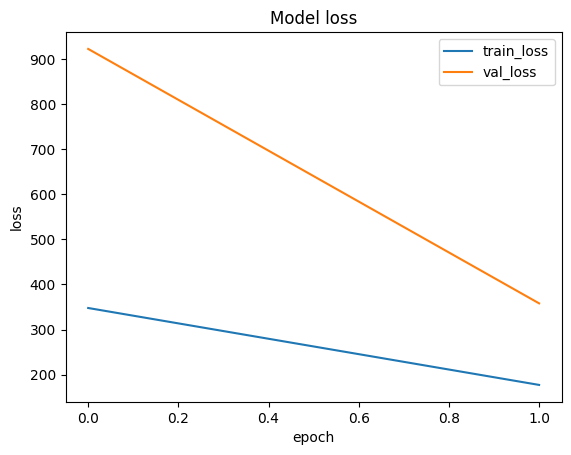

In [ ]:
# Representamos los scores del entrenamiento

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

IMPORTAR & EXPLORAR EL DATASET PARA LA DETECCIÓN DE EXPRESIONES FACIALES

In [ ]:
# Leemos el CSV para los datos de expresiones faciales
facialexpression_df = pd.read_csv('icml_face_data.csv')

In [ ]:
facialexpression_df

emotion                                             pixels
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1            0  151 150 147 155 148 133 111 140 170 174 182 15...
2            2  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3            2  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4            3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
...        ...                                                ...
24563        3  0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564        0  181 177 176 156 178 144 136 132 122 107 131 16...
24565        3  178 174 172 173 181 188 191 194 196 199 200 20...
24566        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
24567        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...

[24568 rows x 2 columns]

In [ ]:
facialexpression_df[' pixels'][0] # Formato String

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [ ]:
# Función para convertir valores de píxel de formato string a formato array

def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

In [ ]:
# Redimensionamos la imagen de (48, 48) a (96, 96)

def resize(x):

  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [ ]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: string2array(x))

In [ ]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(x))

In [ ]:
facialexpression_df.head()

emotion                                             pixels
0        0  [[69.316925, 73.03865, 79.13719, 84.17186, 85....
1        0  [[151.09435, 150.91393, 150.65791, 148.96367, ...
2        2  [[23.061905, 25.50914, 29.47847, 33.99843, 36....
3        2  [[20.083221, 19.079437, 17.398712, 17.158691, ...
4        3  [[76.26172, 76.54747, 77.001785, 77.7672, 78.4...

In [ ]:
# Comprobamos la estructura del data frame
facialexpression_df.shape

(24568, 2)

In [ ]:
# Miramos si hay valores nulos en el data frame
facialexpression_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [ ]:
label_to_text = {0:'Ira', 1:'Odio', 2:'Tristeza', 3:'Felicidad', 4: 'Sorpresa'}

Visualizar la primera imagen del data frame y ver que la imagen no se distorsiona al cambiar el tamaño o debido a las operaciones de remodelación

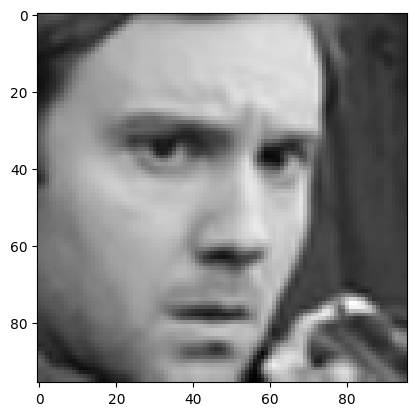

In [ ]:
plt.imshow(facialexpression_df[' pixels'][0], cmap = 'gray')

VISUALIZAR LAS IMÁGENES Y MOSTRAR LAS ETIQUETAS

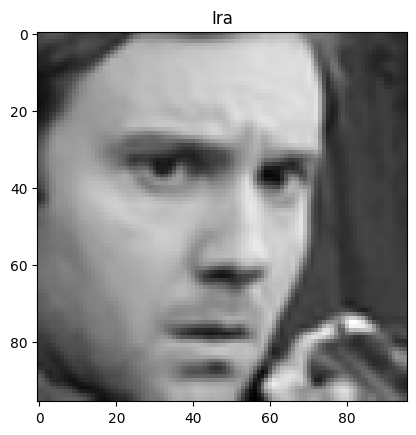

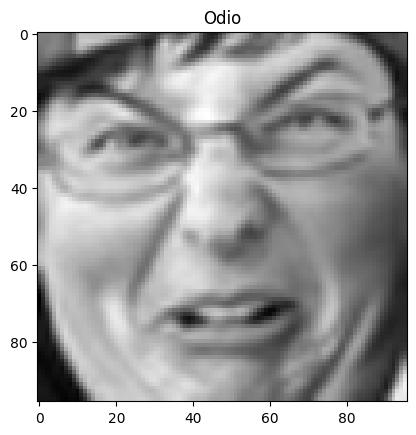

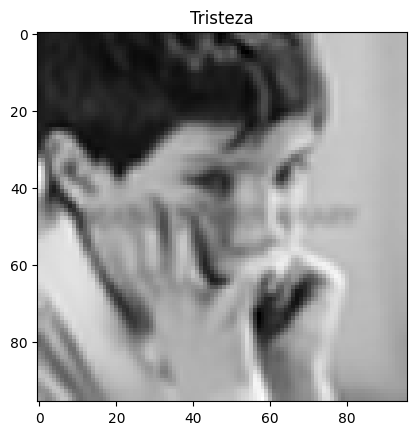

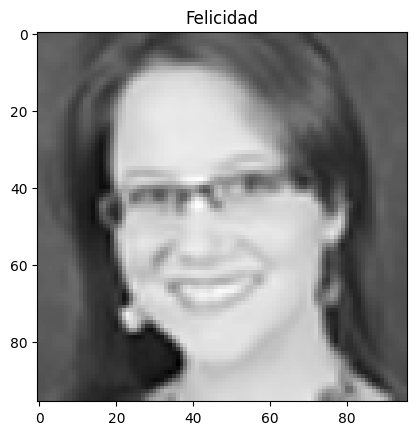

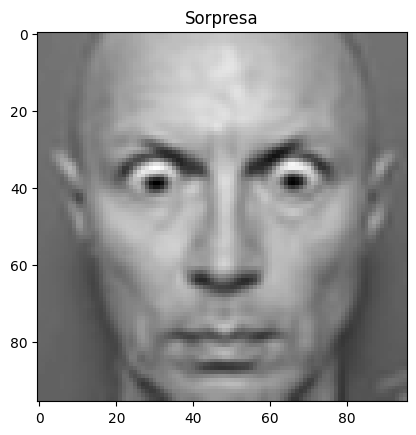

In [ ]:
emotions = [0, 1, 2, 3, 4]

for i in emotions:
  data = facialexpression_df[facialexpression_df['emotion'] == i][:1]
  img = data[' pixels'].item()
  img = img.reshape(96, 96)
  plt.figure()
  plt.title(label_to_text[i])
  plt.imshow(img, cmap = 'gray')

Representamos un gráfico de barras para averiguar cuántas muestras (imágenes) están presentes por cada emoción

In [ ]:
facialexpression_df.emotion.value_counts().index

Int64Index([3, 2, 0, 4, 1], dtype='int64')

In [ ]:
facialexpression_df.emotion.value_counts()

3    8989
2    6077
0    4953
4    4002
1     547
Name: emotion, dtype: int64

<Axes: xlabel='None', ylabel='emotion'>

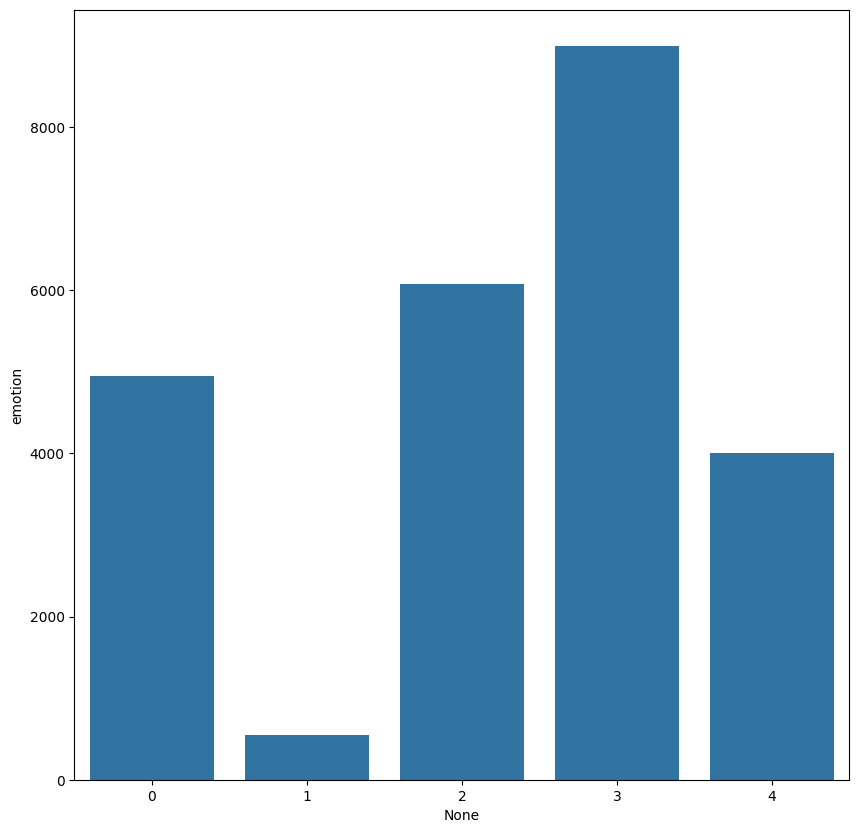

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = facialexpression_df.emotion.value_counts().index, y = facialexpression_df.emotion.value_counts())

PREPARACIÓN DE LOS DATOS Y AUMENTACIÓN DE LAS IMÁGENES

In [ ]:
# Dividir el dataframe en características y etiquetas para la clasificación
from tensorflow.keras.utils import to_categorical

X = facialexpression_df[' pixels']
y = to_categorical(facialexpression_df['emotion'])


In [ ]:
X[0]

array([[ 69.316925,  73.03865 ,  79.13719 , ...,  40.73619 ,  40.6584  ,
         40.5394  ],
       [ 68.66325 ,  70.95224 ,  74.71768 , ...,  43.274765,  42.037186,
         41.223618],
       [ 67.768814,  67.71646 ,  67.67172 , ...,  47.39473 ,  44.26329 ,
         42.31465 ],
       ...,
       [ 74.89021 ,  76.79553 ,  79.90259 , ...,  71.463425,  59.32875 ,
         51.74736 ],
       [ 76.68126 ,  75.808105,  74.25452 , ...,  93.943375,  79.77934 ,
         71.13246 ],
       [ 77.63858 ,  75.15074 ,  70.8846  , ..., 107.66351 ,  92.23212 ,
         82.91585 ]], dtype=float32)

In [ ]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
X.shape

(24568,)

In [ ]:

X = np.stack(X, axis = 0)
X = X.reshape(24568, 96, 96, 1)

print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [ ]:
# Dividir el dataframe en conjunto de entrenamiento, test y validación

from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)


In [ ]:
print(X_val.shape, y_val.shape)

(1228, 96, 96, 1) (1228, 5)


In [ ]:
print(X_Test.shape, y_Test.shape)

(1229, 96, 96, 1) (1229, 5)


In [ ]:
print(X_train.shape, y_train.shape)

(22111, 96, 96, 1) (22111, 5)


In [ ]:
# Pre Procesado de Imágenes

X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

In [ ]:
X_train

array([[[[ 4.67213184e-01],
         [ 4.76177752e-01],
         [ 4.91275936e-01],
         ...,
         [ 2.50535965e-01],
         [ 2.52414525e-01],
         [ 2.53486663e-01]],

        [[ 4.72336650e-01],
         [ 4.76071119e-01],
         [ 4.82436001e-01],
         ...,
         [ 2.52644449e-01],
         [ 2.56634593e-01],
         [ 2.59019196e-01]],

        [[ 4.81131345e-01],
         [ 4.76213276e-01],
         [ 4.68134612e-01],
         ...,
         [ 2.56299496e-01],
         [ 2.63604432e-01],
         [ 2.68052161e-01]],

        ...,

        [[ 9.46511507e-01],
         [ 9.47777092e-01],
         [ 9.49904323e-01],
         ...,
         [ 5.81580520e-01],
         [ 7.56193757e-01],
         [ 8.63447189e-01]],

        [[ 9.51056004e-01],
         [ 9.51432765e-01],
         [ 9.52066362e-01],
         ...,
         [ 2.75387526e-01],
         [ 4.65416998e-01],
         [ 5.80326498e-01]],

        [[ 9.53812003e-01],
         [ 9.53660131e-01],
         [

CONSTRUIMOS Y ENTRENAMOS UN MODELO DE DEEP LEARNING PARA LA CLASIFICACIÓN DE EXPRESIONES FACIALES

In [ ]:
input_shape = (96, 96, 1)

# Tamaño del tensor de entrada
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - Fase
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - Fase
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - Fase
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - Fase
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Capa Final
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model(inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d_1 (ZeroPadd  (None, 102, 102, 1)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           3200      ['zero_padding2d_1[0][0]']    
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1[0][0]']        

In [ ]:
# Entrenar la red
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# Recordemos que el primer modelo de puntos faciales clave se guardó con: FacialKeyPoints_weights.hdf5 and FacialKeyPoints-model.json

# Usamos la parada temprana para salir del entenamiento si el error de validación
# no decrece después de cierto número de epochs (paciencia)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# Guardamos el mejor modelo con menor error de validación
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose = 1,
                               save_best_only=True)

In [ ]:
train_datagen = ImageDataGenerator()
history = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=64),
	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,
	epochs= 2, callbacks=[ checkpointer, earlystopping])

Epoch 1/2
344/345 [============================>.] - ETA: 0s - loss: 1.1401 - accuracy: 0.5460
Epoch 1: val_loss improved from inf to 1.60937, saving model to FacialExpression_weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


345/345 [==============================] - 27s 41ms/step - loss: 1.1387 - accuracy: 0.5466 - val_loss: 1.6094 - val_accuracy: 0.3542
Epoch 2/2
344/345 [============================>.] - ETA: 0s - loss: 0.7896 - accuracy: 0.6905
Epoch 2: val_loss improved from 1.60937 to 1.02222, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 12s 34ms/step - loss: 0.7898 - accuracy: 0.6904 - val_loss: 1.0222 - val_accuracy: 0.5920


In [ ]:
# Guardar la arquitectura del modelo en un JSON para su futuro uso

model_json = model_2_emotion.to_json()
with open("FacialExpression-model.json","w") as json_file:
  json_file.write(model_json)

EVALUAMOS LA EFICACIA DEL MODELO CLASIFICADOR DE EXPRESIONES FACIALES ENTRENADO

In [ ]:
with open('emotion.json', 'r') as json_file:
    json_savedModel= json_file.read()

# Cargamos la arquitectura del modelo
model_2_emotion = tf.keras.models.model_from_json(json_savedModel)
model_2_emotion.load_weights('weights_emotions.hdf5')
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
score = model_2_emotion.evaluate(X_Test, y_Test)
print('Accuracy en la fase de Test: {}'.format(score[1]))

39/39 [==============================] - 1s 18ms/step - loss: 0.3683 - accuracy: 0.8625
Accuracy en la fase de Test: 0.8624898195266724


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

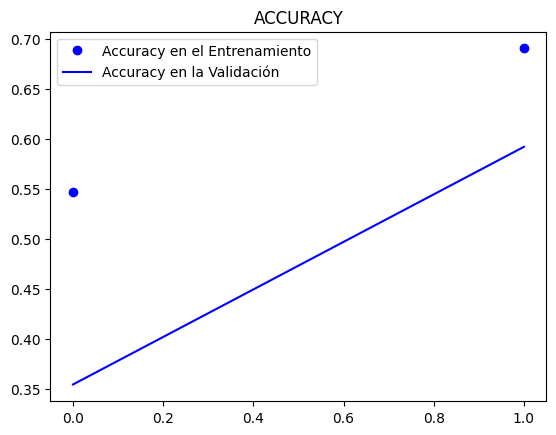

In [ ]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Accuracy en el Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Accuracy en la Validación')
plt.title('ACCURACY')
plt.legend()

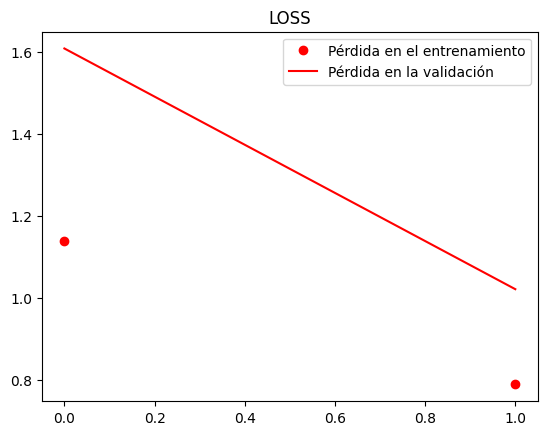

In [ ]:
plt.plot(epochs, loss, 'ro', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.title('LOSS')
plt.legend()

In [ ]:
# predicted_classes = model.predict_classes(X_test)
predicted_classes = np.argmax(model_2_emotion.predict(X_Test), axis=-1)
y_true = np.argmax(y_Test, axis=-1)

39/39 [==============================] - 1s 5ms/step


In [ ]:
y_true.shape

(1229,)

<Axes: >

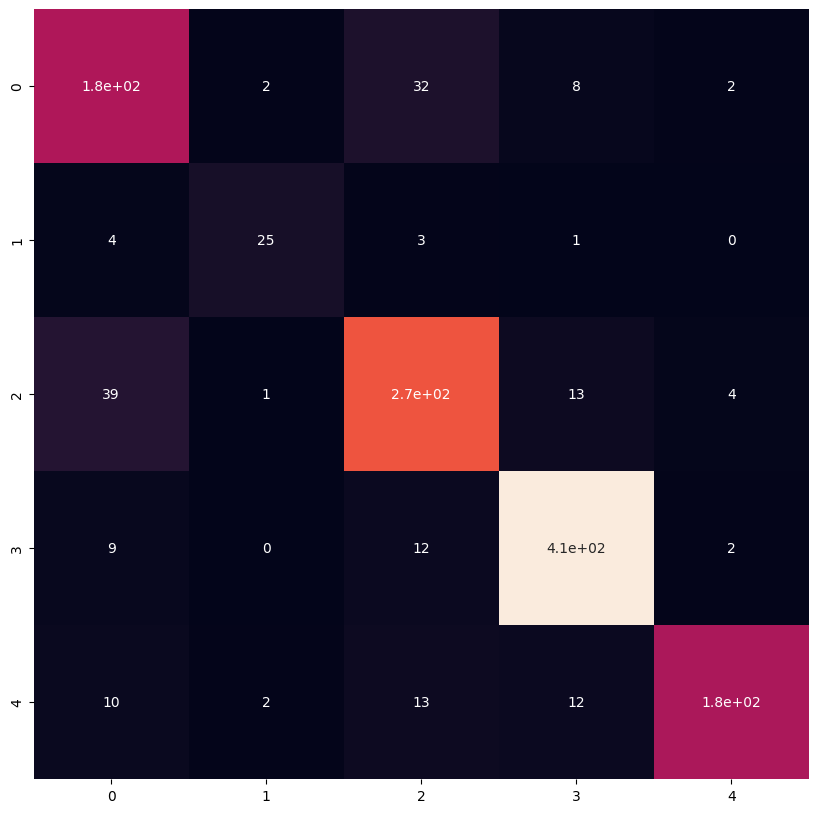

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)


Mostramos una matriz de 25 imágenes junto con su etiqueta predicha / verdadera y
mostramos el informe de clasificación y analizar la precisión y la recuperación

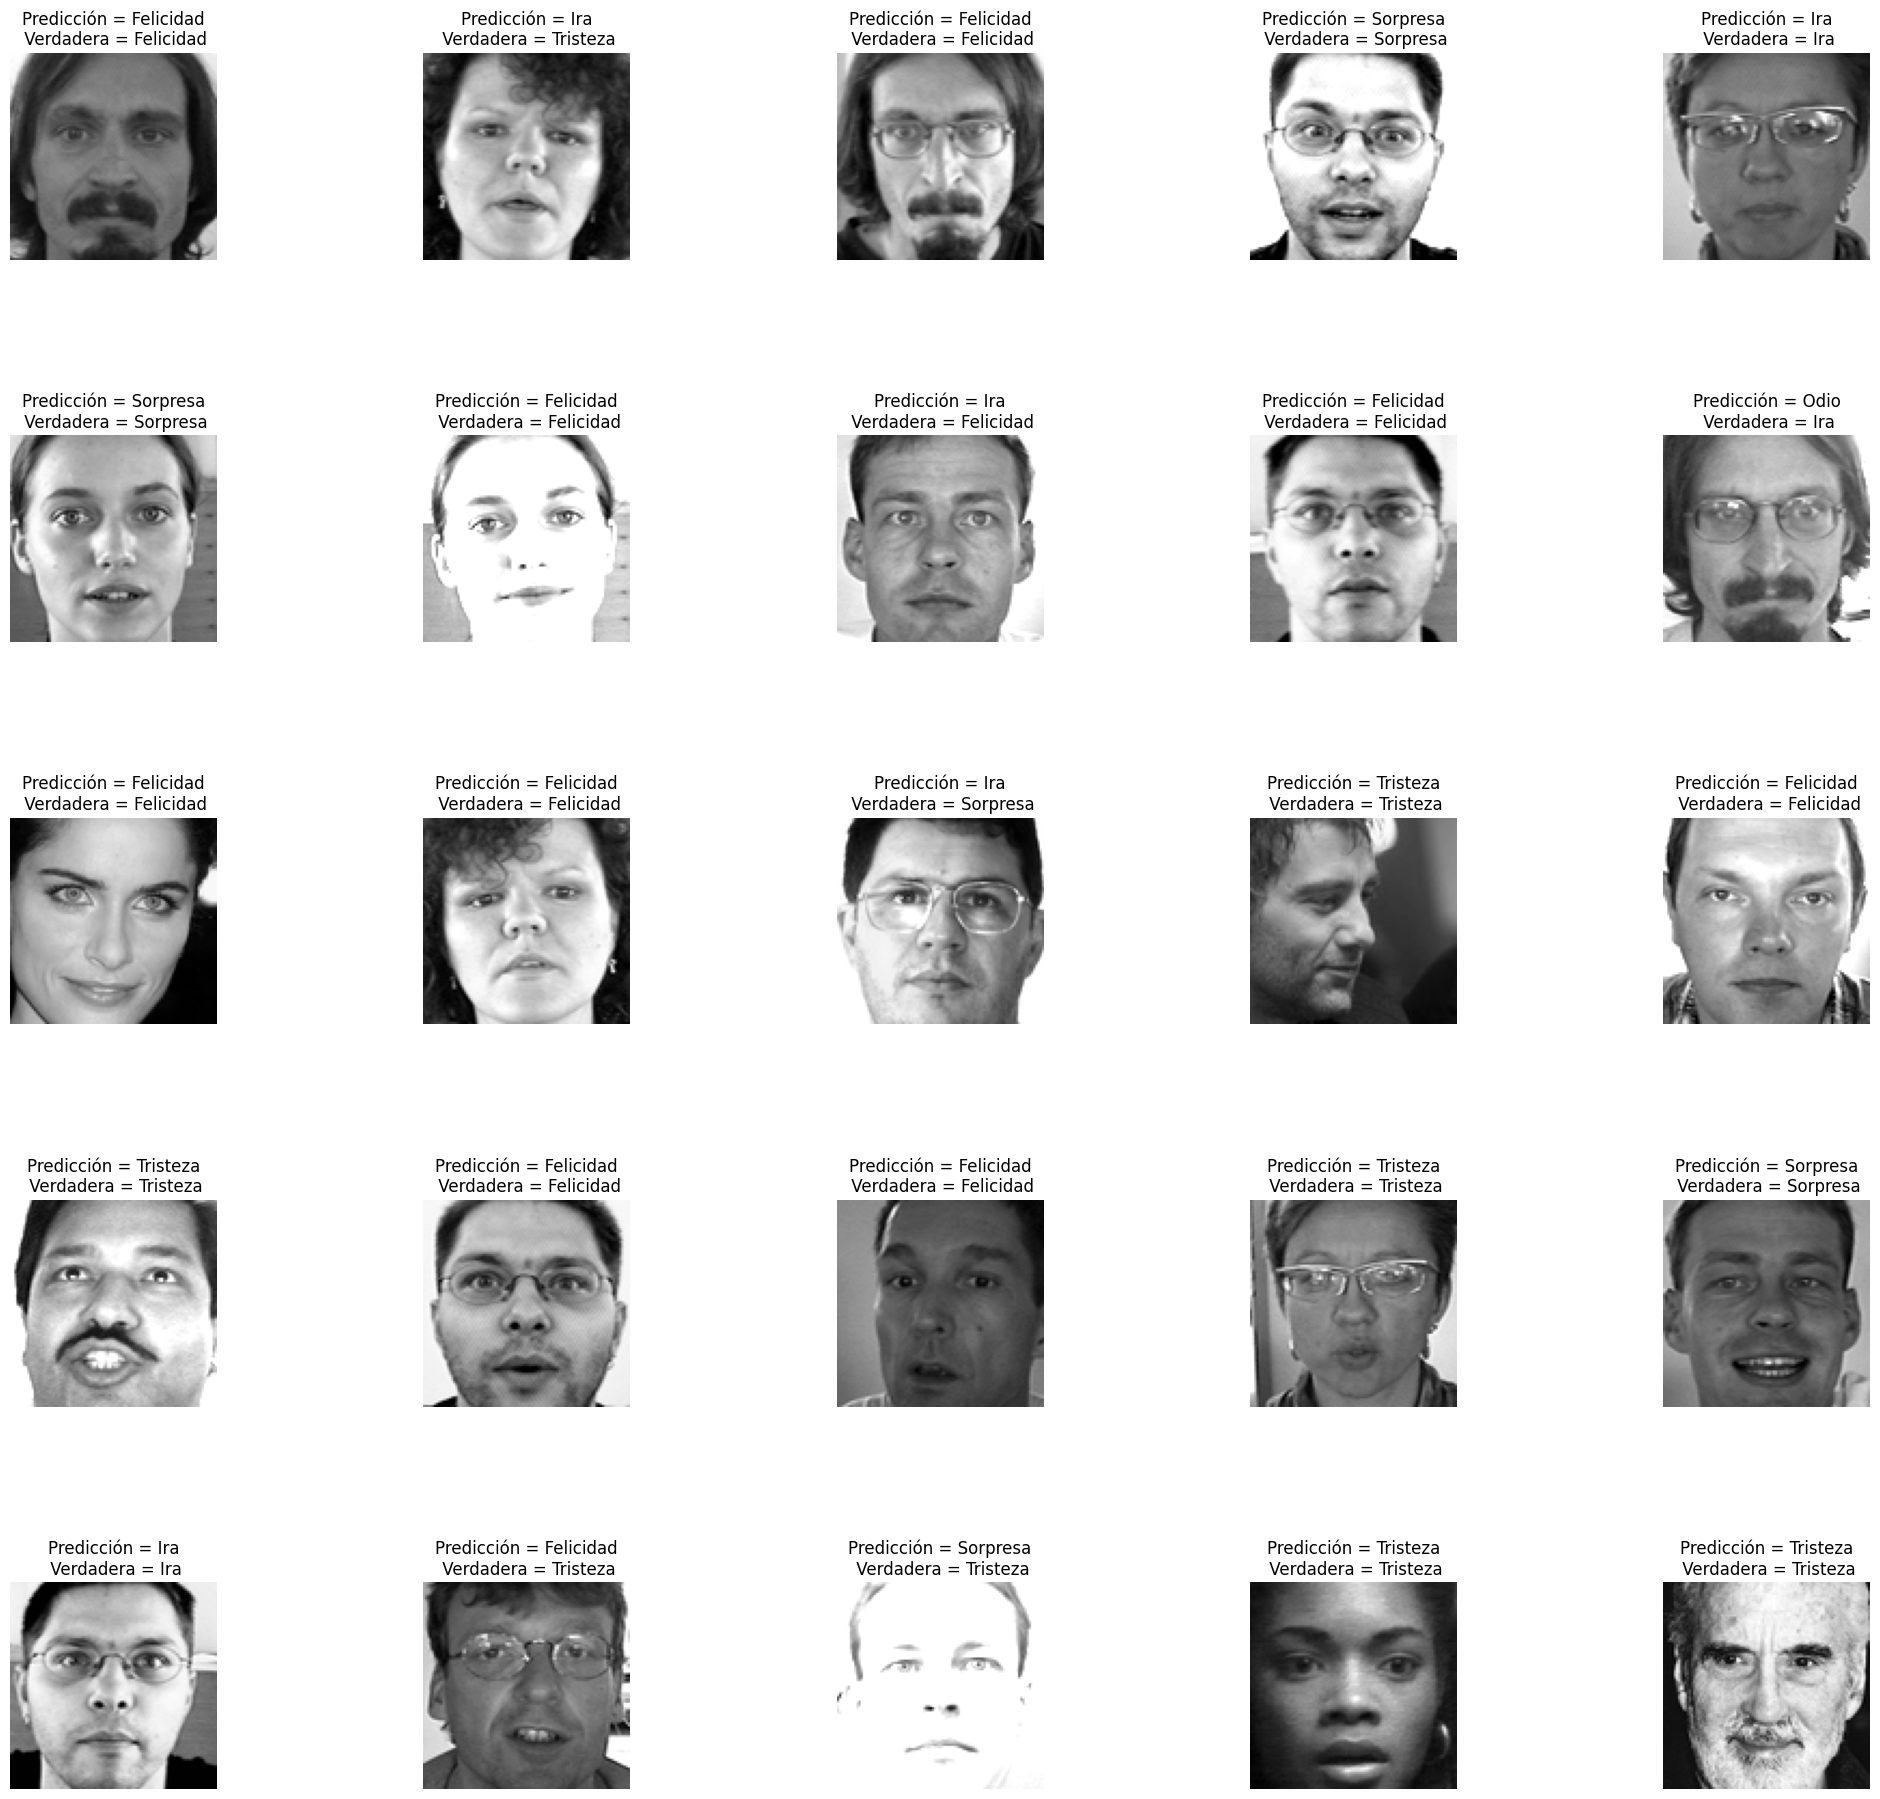

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Predicción = {}\n Verdadera = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       223
           1       0.83      0.76      0.79        33
           2       0.82      0.82      0.82       323
           3       0.92      0.95      0.94       437
           4       0.96      0.83      0.89       213

    accuracy                           0.86      1229
   macro avg       0.85      0.83      0.84      1229
weighted avg       0.87      0.86      0.86      1229



COMBINAR AMBOS MODELOS (1) DETECCIÓN DE PUNTOS CLAVE FACIALES Y (2) DE EXPRESIONES FACIALES

In [ ]:
def predict(X_test):

  # Hacemos la predicción con el modelo de puntos clave
  df_predict = model_1_facialKeyPoints.predict(X_test)

  # Hacemos la predicción con el modelo de emociones
  df_emotion = np.argmax(model_2_emotion.predict(X_test), axis=-1)

  # Redimensionamos el array de (856,) a (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Convertimos las predicciones en un dataframe
  df_predict = pd.DataFrame(df_predict, columns= columns)

  # Añadimos la emoción al dataframe de predicciones
  df_predict['emotion'] = df_emotion

  return df_predict

In [ ]:
df_predict = predict(X_test)

41/41 [==============================] - 0s 5ms/step


In [ ]:
df_predict.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          29.459944          37.106976           63.540348   
1          31.438646          36.053493           66.813492   
2          31.170378          36.940788           64.421135   
3          66.709511          38.508633           30.970545   
4          29.597269          36.870964           65.742989   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           37.474209                35.400406                37.866127   
1           39.517170                37.398270                36.470490   
2           36.998058                36.929508                37.889019   
3           36.353462                61.159359                38.783169   
4           36.537609                35.719055                37.235283   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                23.656919                37.409554                 57.994598   
1                25.412140                35.913101                 60.640888   
2                25.621696                36.983364                 58.812080   
3                72.404831                39.402241                 36.407730   
4                23.604050                37.792698                 59.701210   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 38.010212  ...   57.369629            32.734550   
1                 38.529385  ...   47.702320            32.162041   
2                 37.954041  ...   61.591785            33.791592   
3                 37.150467  ...   54.394608            61.678261   
4                 36.811771  ...   54.242344            34.527718   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            74.900208             61.461578             75.082047   
1            70.254402             60.532024             73.148735   
2            73.071281             64.269768             73.196663   
3            76.162636             33.941418             75.010895   
4            73.618599             61.993259             73.126625   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               47.681927               70.501656                  47.690792   
1               47.336697               63.938961                  46.166889   
2               48.817055               71.313087                  49.058239   
3               47.686768               70.074974                  47.291798   
4               48.204556               68.028427                  48.329357   

   mouth_center_bottom_lip_y  emotion  
0                  81.905884        2  
1                  78.018806        2  
2                  80.418800        2  
3                  84.358398        4  
4                  80.654839        0  

[5 rows x 31 columns]

Representamos una matriz de  16 imágenes junto con su emoción predicha y sus puntos faciales.

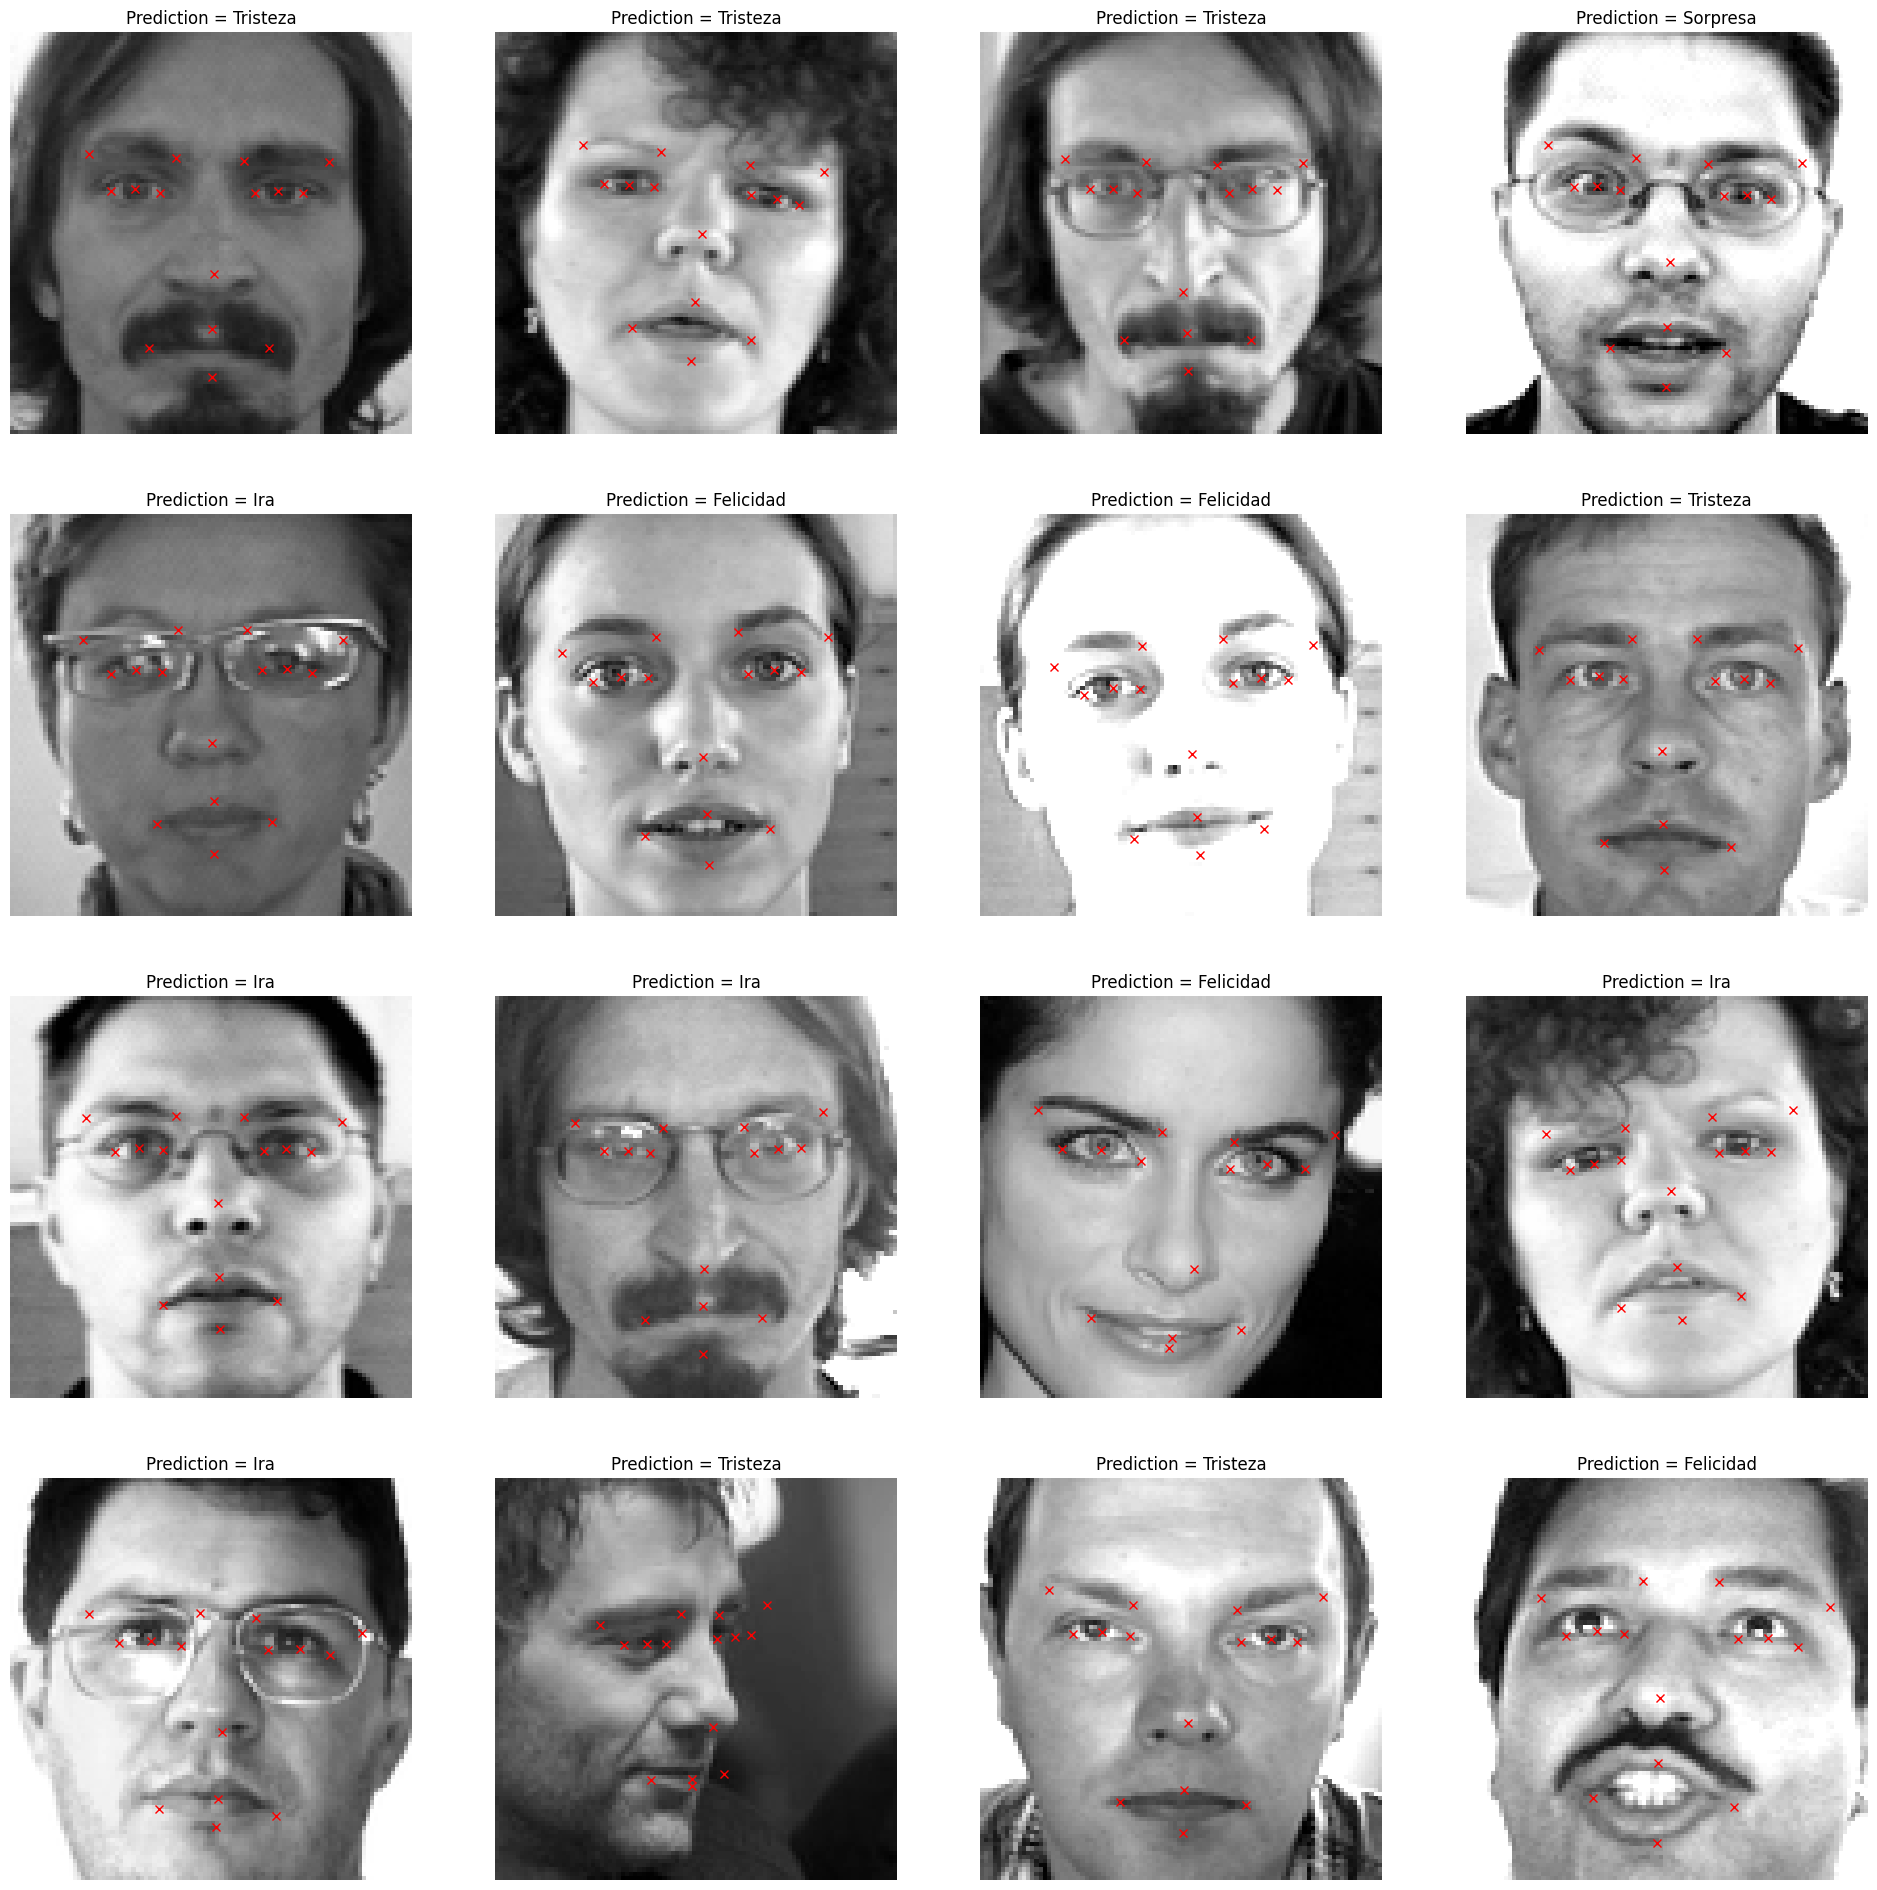

In [ ]:
# Representamos las imágenes de test junto con los puntos clave y emociones

fig, axes = plt.subplots(4, 4, figsize = (24, 24))
axes = axes.ravel()

for i in range(16):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')


DESPLEGAR LOS DOS MODELOS ENTRENADOS

GUARDAR EL MODELO ENTRENADO PARA PUBLICAR

In [ ]:
import json
import tensorflow.keras.backend as K

def deploy(directory, model):
  MODEL_DIR = directory
  version = 1

  # Juntamos el directorio del temp model con la versión elegida
  # El resultado será = '\tmp\version number'
  export_path = os.path.join(MODEL_DIR, str(version))
  print('export_path = {}\n'.format(export_path))

  # Guardemos el modelo con saved_model.save
  # Si el directorio existe, debemos borrarlo con '!rm'
  # rm elimina cada fichero especificado usando la consola de comandos.

  if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

  tf.saved_model.save(model, export_path)

  os.environ["MODEL_DIR"] = MODEL_DIR

PUBLICAR EL MODELO CON TENSORFLOW SERVING

In [ ]:
# Agreguemos el paquete tensorflow-model-server a nuestra lista de paquetes
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key is deprecated. Manage keyring files in trusted.gpg.d instead (see apt-key(8)).
100  2943  100  2943    0     0   3261      0 --:--:-- --:--:-- --:--:--  3259
OK
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/ubunt

In [ ]:
# Instalemos tensorflow model server
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 650 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.16.1 [650 MB]
Fetched 650 MB in 23s (28.5 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.16.1_all.deb ...
Unpacking tensorflow-model-server (2.16.1) ...
Setting up tensorflow-model-server (2.16.1) ...


In [ ]:
deploy('/model', model_1_facialKeyPoints)

export_path = /model/1



In [ ]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=4500 \
  --model_name=keypoint_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [ ]:
!tail server.log

In [ ]:
deploy('/model1', model_2_emotion)

export_path = /model1/1



In [ ]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=4000 \
  --model_name=emotion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [ ]:
!tail server.log

[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 250] NET_LOG: Entering the event loop ...


HACER PETICIONES AL MODELO CON TENSORFLOW SERVING

In [ ]:
import json

# Vamos a crear un objeto JSON y hacer predicciones
data = json.dumps({"signature_name": "serving_default", "instances": X_test[0:50].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... 85], [0.44607770442962646], [0.4202181100845337]]]]}


In [ ]:
!pip install -q requests

In [ ]:
import requests

# Función para hacer predicciones con el modelo publicado
def response(data):
  headers = {"content-type": "application/json"}
  json_response = requests.post('http://localhost:4500/v1/models/keypoint_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_predict = json.loads(json_response.text)['predictions']
  json_response = requests.post('http://localhost:4000/v1/models/emotion_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_emotion = np.argmax(json.loads(json_response.text)['predictions'], axis = 1)

  # Redimensión de (856,) a (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Convertir las predicciones en un dataframe
  df_predict= pd.DataFrame(df_predict, columns = columns)

  # Añadimos la emoción al dataframe de predicciones
  df_predict['emotion'] = df_emotion

  return df_predict

In [ ]:
# Hacer una predicción
df_predict = response(data)

In [ ]:
df_predict

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0           29.459942          37.106979           63.540352   
1           31.438648          36.053494           66.813492   
2           31.170380          36.940788           64.421127   
3           66.709500          38.508633           30.970547   
4           29.597271          36.870960           65.742981   
5           66.075447          36.680141           29.675753   
6           66.486862          38.703449           31.249296   
7           66.017258          38.824146           31.283403   
8           65.543518          35.900900           30.304962   
9           67.039139          36.081036           31.227074   
10          28.392487          36.257328           67.877594   
11          66.326714          36.436378           30.214764   
12          33.128197          38.316753           68.685730   
13          35.774338          39.155212           56.890514   
14          69.000214          37.855030           28.460718   
15          71.778900          37.726658           30.790371   
16          66.254860          38.966034           28.442017   
17          31.531879          38.552555           66.224564   
18          31.403839          37.242992           66.557434   
19          29.155838          37.895718           67.118279   
20          29.406862          36.604931           66.090300   
21          70.811844          32.771133           31.667456   
22          66.197571          37.705616           30.026461   
23          24.803103          37.788944           66.405190   
24          31.055155          36.696026           65.165436   
25          69.633804          39.505478           32.186283   
26          29.061851          35.877605           67.209808   
27          66.405319          36.387546           32.932396   
28          65.352400          38.969459           29.792820   
29          28.916658          36.945931           66.784958   
30          66.452240          37.533306           29.979042   
31          28.199587          37.281803           69.107689   
32          27.515781          34.542309           66.037422   
33          28.952528          39.563225           64.425331   
34          65.372505          36.988552           31.308947   
35          67.166657          38.668896           26.982679   
36          65.312100          36.572746           29.093309   
37          31.778300          35.247513           65.579964   
38          67.416031          36.826656           28.243229   
39          30.469564          34.256657           68.342567   
40          65.176392          36.799664           31.153332   
41          31.722157          35.918881           65.907288   
42          64.576179          39.525921           32.450863   
43          66.224747          39.613090           30.004141   
44          31.762011          35.125313           67.168518   
45          68.297333          38.210007           29.217224   
46          65.518387          34.577675           28.795271   
47          64.728200          32.138081           31.576937   
48          65.695709          37.167980           27.866167   
49          67.099510          38.187809           29.868643   

    right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0            37.474213                35.400410                37.866131   
1            39.517170                37.398277                36.470493   
2            36.998062                36.929512                37.889027   
3            36.353462                61.159355                38.783176   
4            36.537605                35.719055                37.235272   
5            38.343872                59.891464                37.700573   
6            41.147766                59.906014                39.907272   
7            38.293152                59.166534                39.447109   
8            35.878487                60.101151        

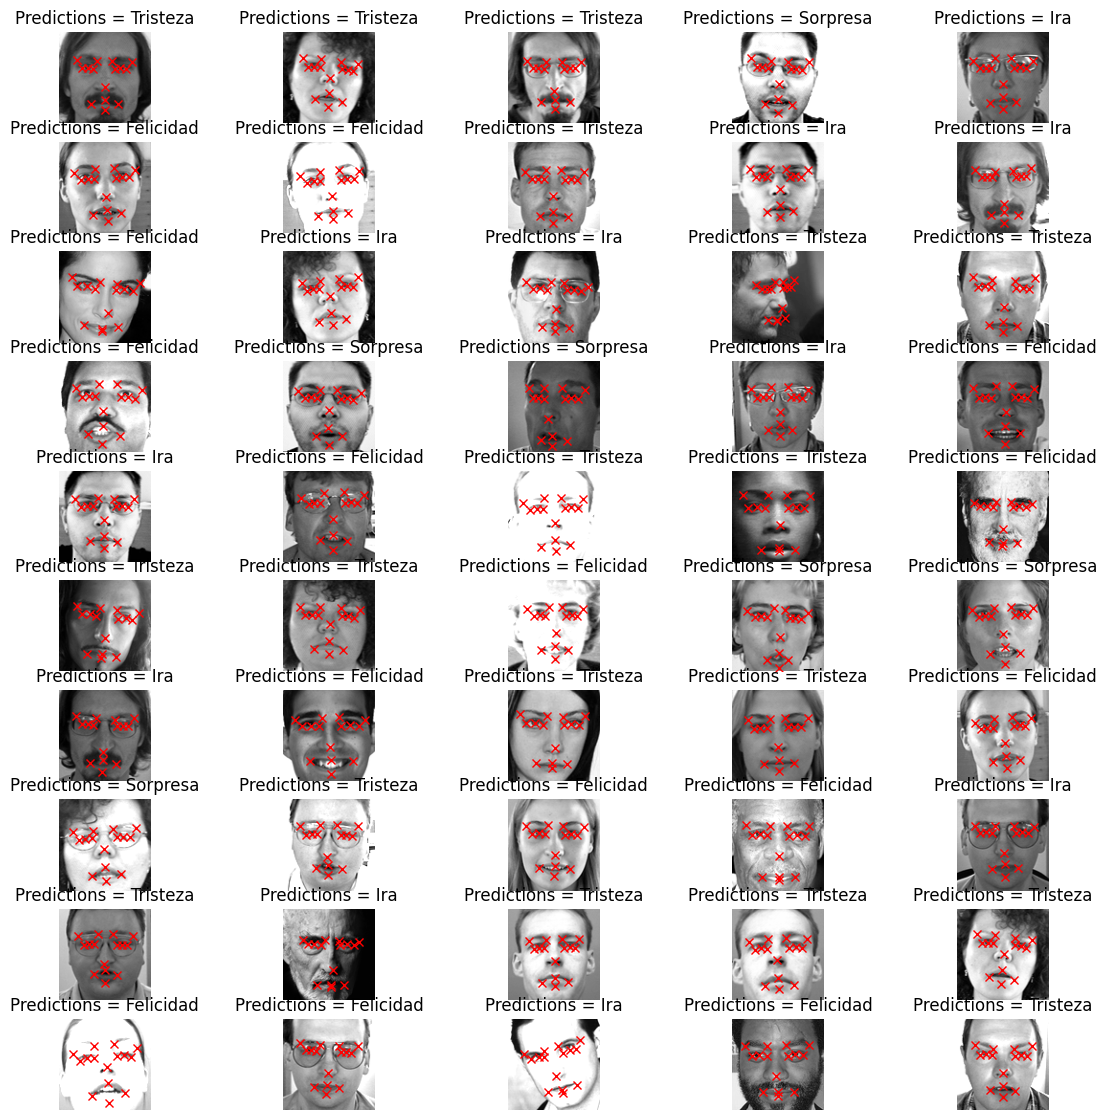

In [ ]:
# Representar las imágenes de test y sus predicciones de puntos clave y emociones

fig, axes = plt.subplots(10, 5, figsize = (14, 14))
axes = axes.ravel()

for i in range(50):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Predictions = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')
